In [2]:
library(tidyverse)
library(janitor)
library(ggplot2)
library(patchwork)
library(mosaic)
library(skimr)
library(GGally)
library(dlookr)
library(rstatix)
library(ggstatsplot)
library(effectsize)
library(gmodels)
library(ISLR)
library(repr)
options(repr.plot.width=20, repr.plot.height=7);

In [3]:
df<- read.csv("data_set_for_stats.csv")

In [4]:
df  %>% head()

,datesold,postcode,price,propertyType,bedrooms
,<chr>,<int>,<int>,<chr>,<int>
1,2007-02-07,2607,525000,house,4
2,2007-02-27,2906,290000,house,3
3,2007-03-07,2905,328000,house,3
4,2007-03-09,2905,380000,house,4
5,2007-03-21,2906,310000,house,3
6,2007-04-04,2905,465000,house,4


In [5]:
df %>% skim()

── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             29580     
Number of columns          5         
_______________________              
Column type frequency:               
  character                2         
  numeric                  3         
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 datesold              0             1  10  10     0     3582          0
2 propertyType          0             1   4   5     0        2          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate      mean         sd    p0    p25    p50
1 postcode              0             1   2730.      147.     2600   2607   2615
2 price                 0      

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


In [6]:
df <- df %>% select(-postcode) 

In [7]:
df$bedrooms<-as.factor(df$bedrooms)
df$propertyType<-as.factor(df$propertyType)
df$datesold<- as.Date.factor(df$datesold)

In [8]:
df %>% glimpse()

Rows: 29,580
Columns: 4
$ datesold     <date> 2007-02-07, 2007-02-27, 2007-03-07, 2007-03-09, 2007-03-…
$ price        <int> 525000, 290000, 328000, 380000, 310000, 465000, 399000, 1…
$ propertyType <fct> house, house, house, house, house, house, house, house, h…
$ bedrooms     <fct> 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 5, 3, 5, 4, …


# *normality check :*
### *normality Test:*<br>*A formal statistical test for normality.*<br> *The null hypothesis states that the data follows a normal distribution shape*

In [9]:
df %>% select(price)  %>%  normality()

vars,statistic,p_value,sample
<chr>,<dbl>,<dbl>,<dbl>
price,0.7582563,3.186331e-65,5000


* *Mann-Whitney U Test -for features that have 2 categories :*<br><br>*equivelent to wilcox.test() wilcox rank sum test with continuity correction,better than wilcox sighned rank exct test(that used when variables are paired)*

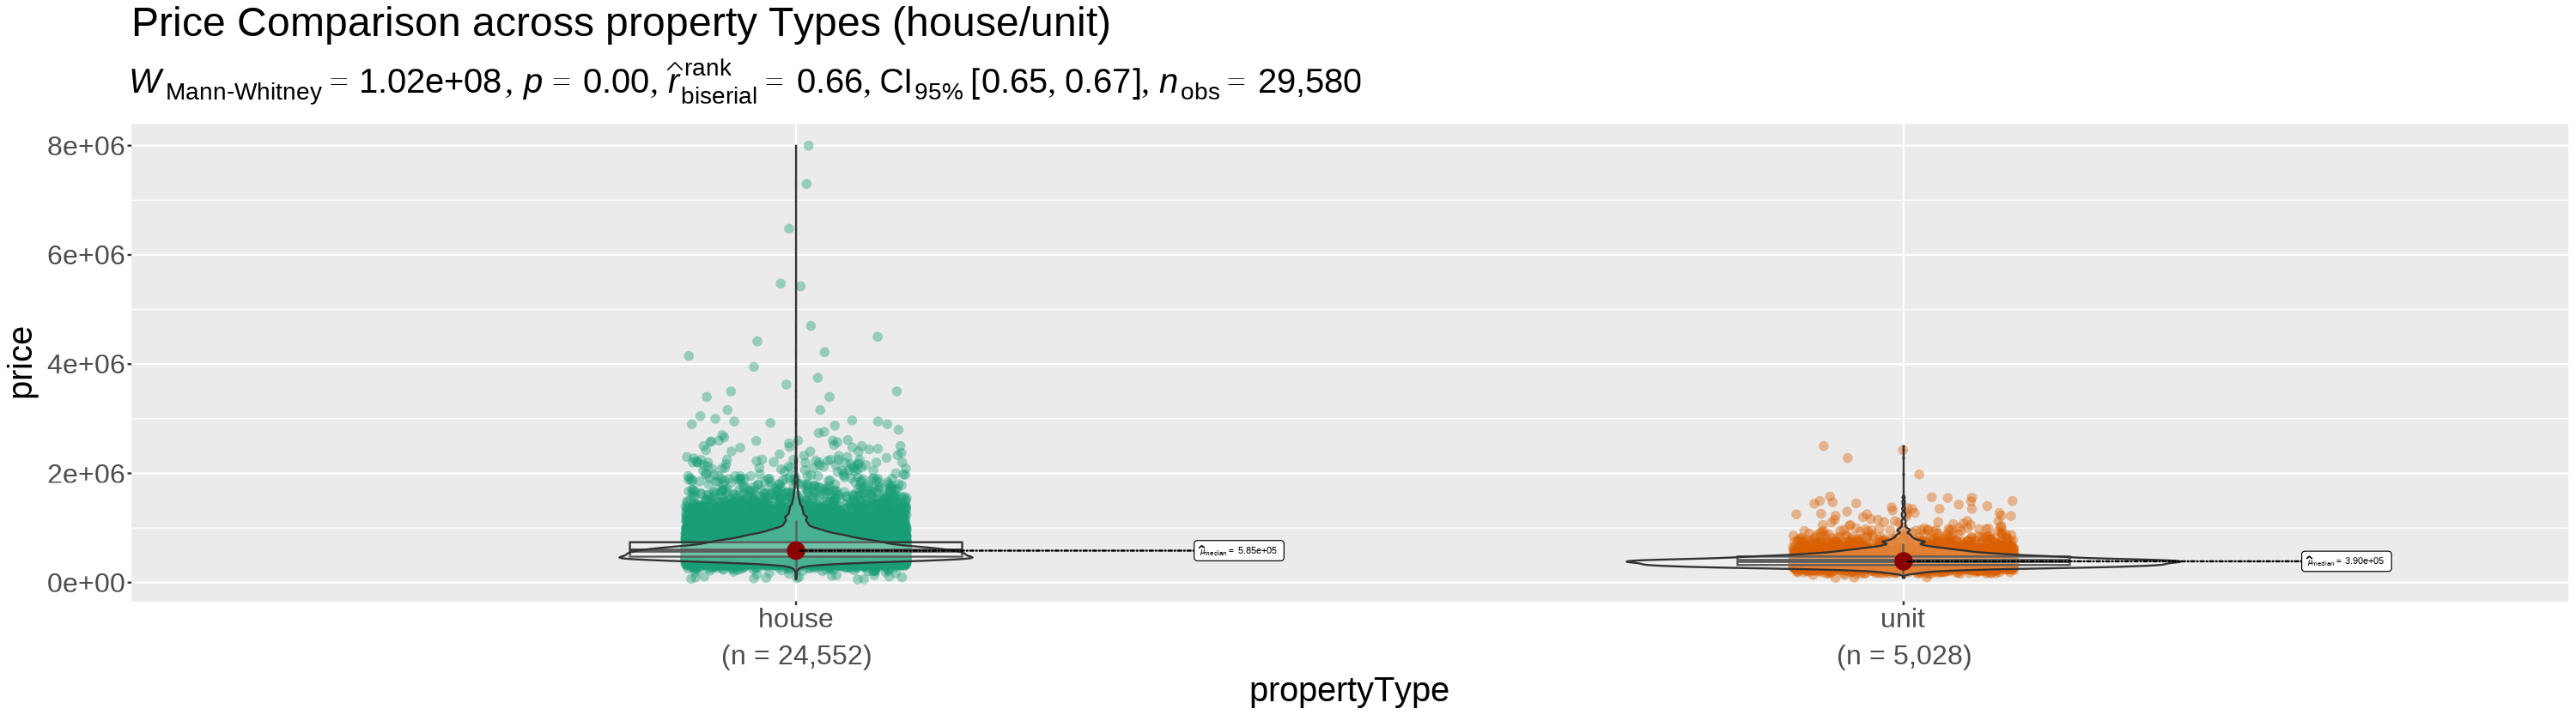

In [115]:
options(repr.plot.width=25, repr.plot.height=7);
Price_Comparison_across_property_Types <-df %>% 
ggbetweenstats(x=propertyType,y=price,type = "nonparamertic",ggtheme = ggplot2::theme_gray(),
title = "Price Comparison across property Types (house/unit)",
ggsignif.args = list(textsize = 3, tip_length = 0.01, na.rm = TRUE))+

theme(text = element_text(size = 30),plot.subtitle = element_text(size = 30),legend.text = element_text(size = 30) )

Price_Comparison_across_property_Types

In [116]:
#extract_stats(Price_Comparison_across_property_Types)

In [11]:
interpret_rank_biserial(0.66) 

[1] "very large"
(Rules: funder2019)


* *kruskal wallis Test -for features that have more than 3 categories :*<br>*discribe: 1. whether at least on group os different from other groups ,2. and between wich groups this difference is*

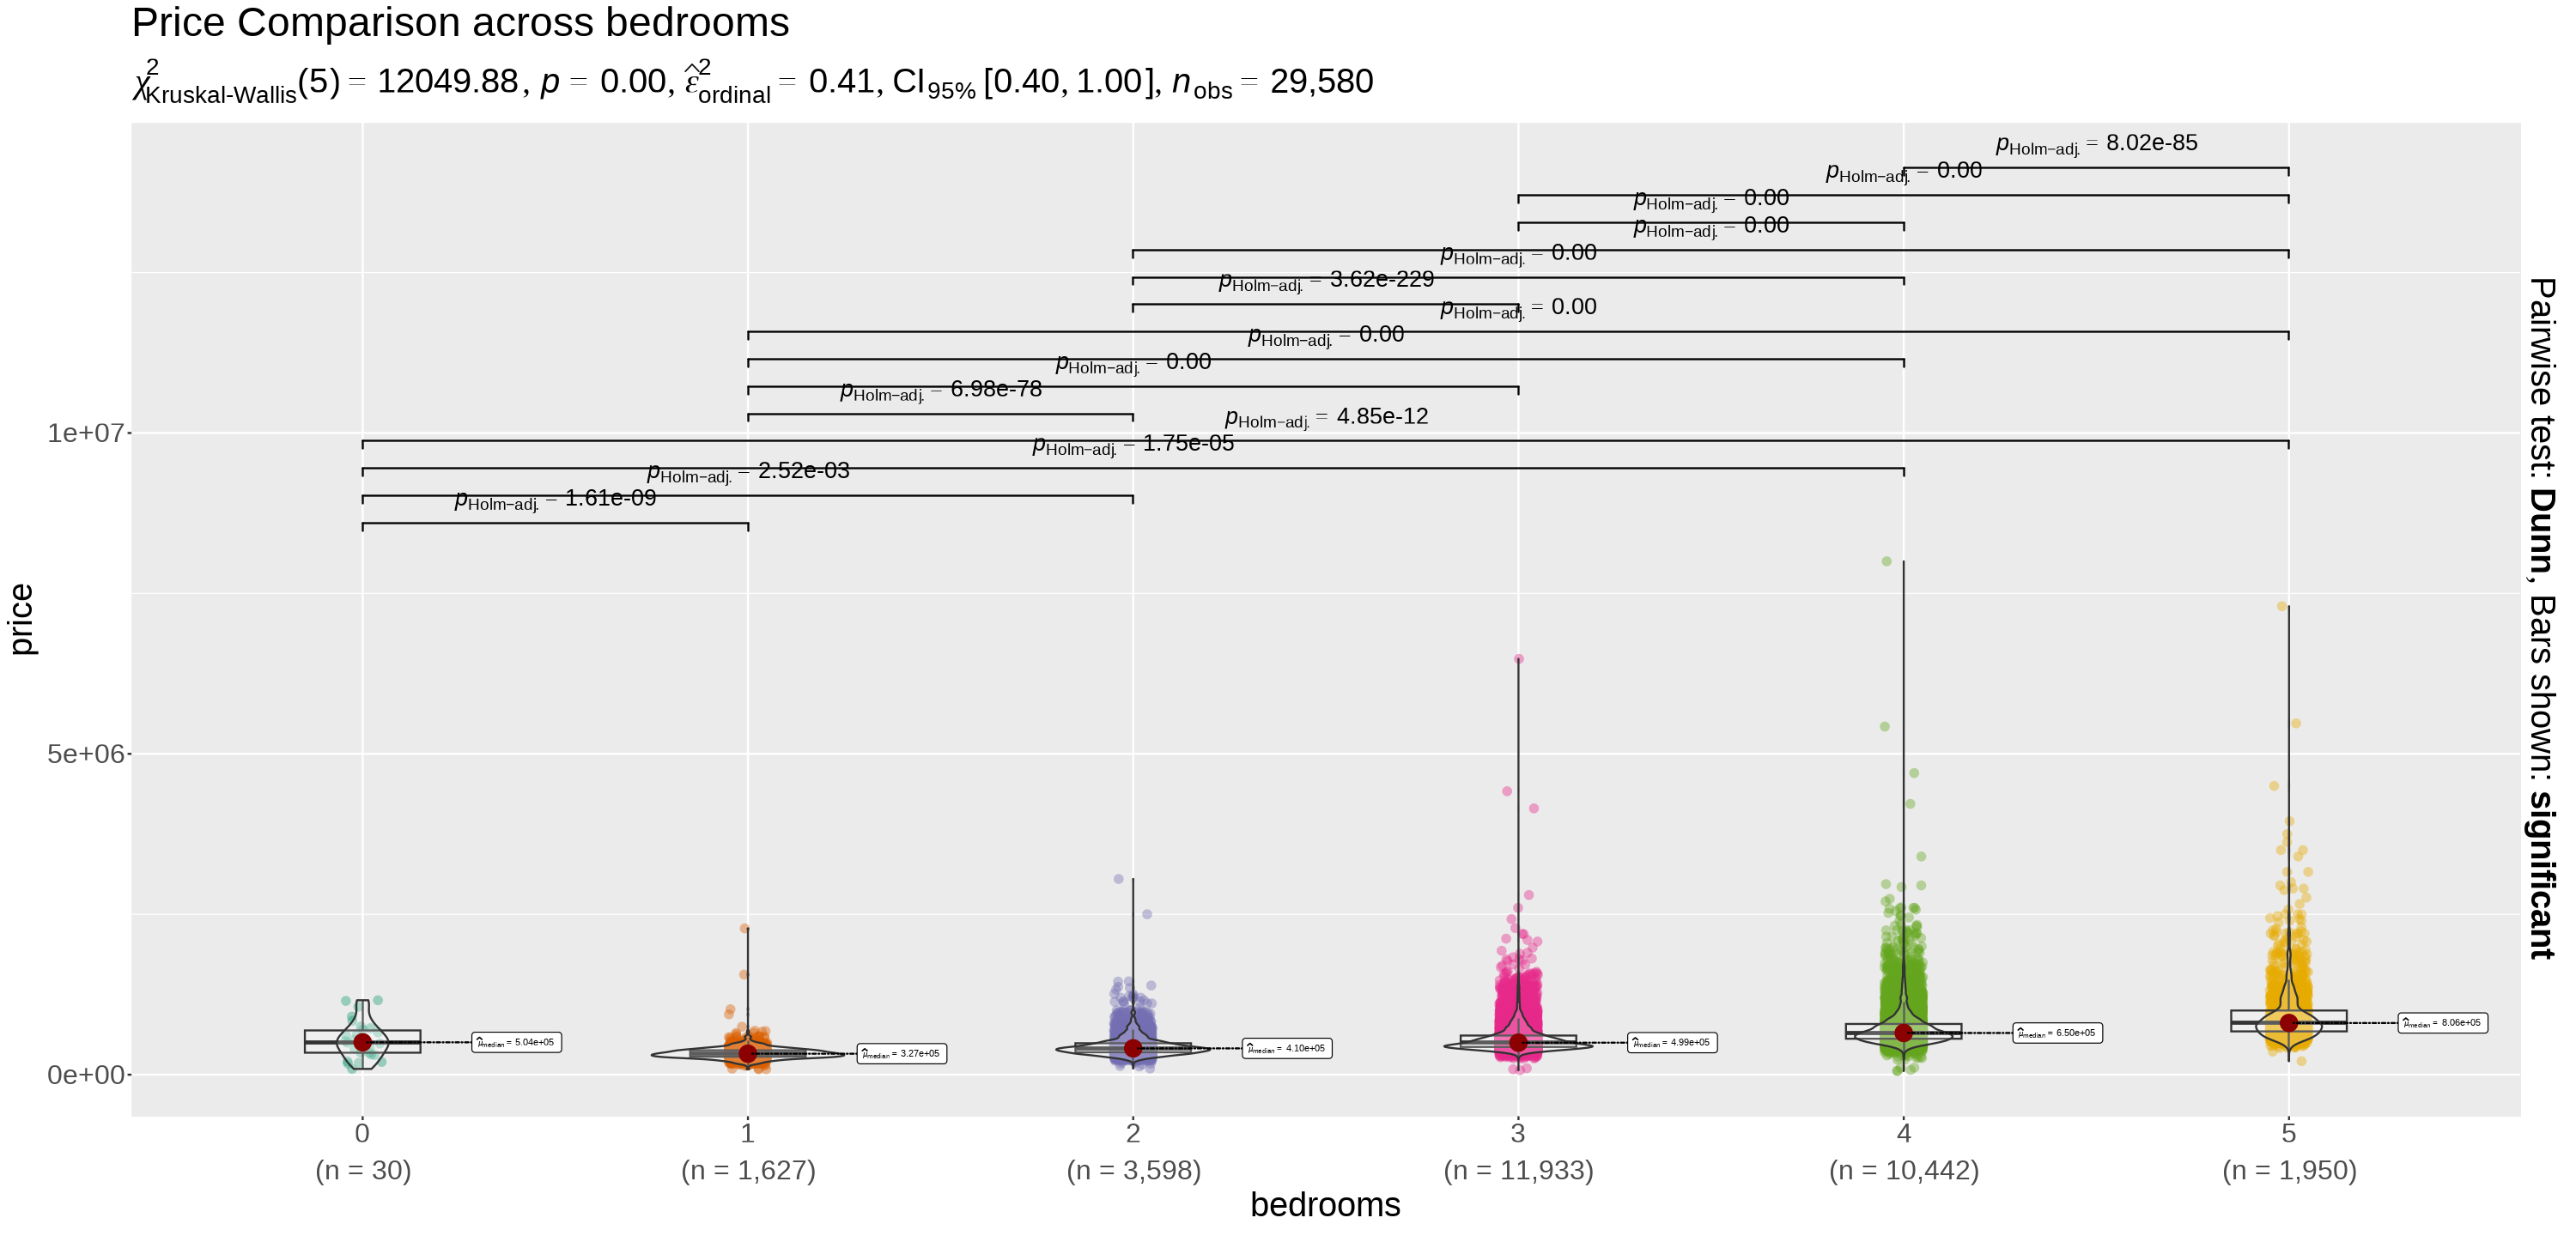

In [113]:
options(repr.plot.width=25, repr.plot.height=12);
Price_Comparison_across_bedrooms<-df %>% 
ggbetweenstats(x=bedrooms,y=price,type = "nonparamertic",ggtheme = ggplot2::theme_gray(),
title = "Price Comparison across bedrooms",
ggsignif.args = list(textsize = 7, tip_length = 0.015, na.rm = TRUE))+
theme(text = element_text(size = 30),
      plot.subtitle = element_text(size = 30),
      legend.title = element_text(size = 30),
      legend.text = element_text(size = 30)
                    )

Price_Comparison_across_bedrooms                    

In [114]:
# extract_stats(Price_Comparison_across_bedrooms)

In [96]:
interpret_epsilon_squared(0.41)

[1] "large"
(Rules: field2013)


---

## *Categorical Features Analysis*

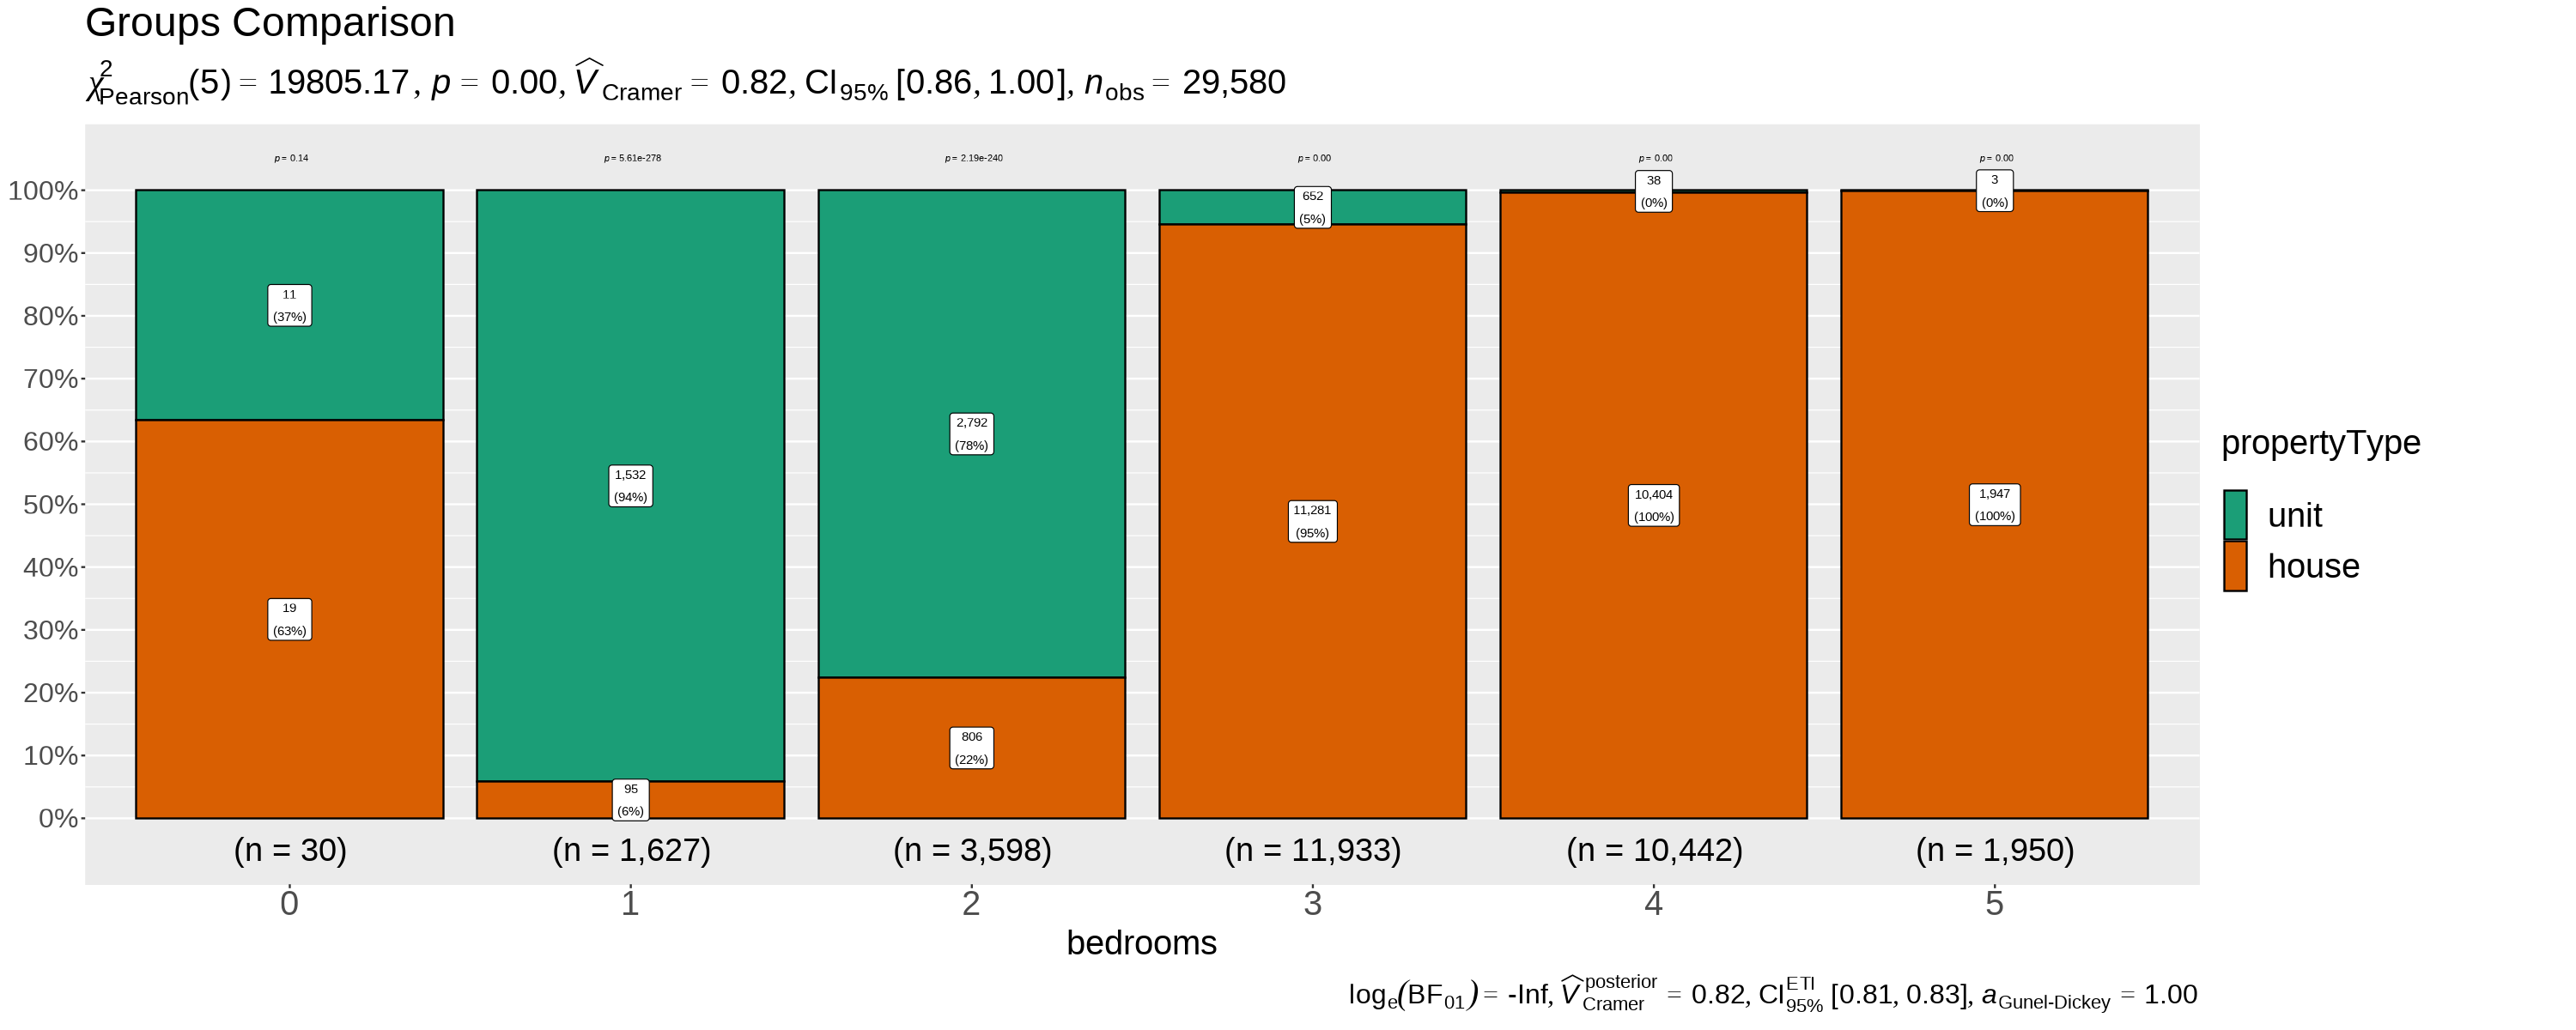

In [56]:
options(repr.plot.width=25, repr.plot.height=10);
Groups_Comparison<-df %>% ggbarstats(x=propertyType,y = bedrooms,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),title ="Groups Comparison")+

theme(text = element_text(size = 30),
      plot.subtitle = element_text(size = 30),
      legend.title = element_text(size = 30),
      legend.text = element_text(size = 30),
      axis.text.x = element_text(size = 30)
      )

Groups_Comparison

In [104]:
extract_stats(Groups_Comparison)[5] %>% as.data.frame() %>% select(c(0:7))

one_sample_data.bedrooms,one_sample_data.counts,one_sample_data.perc,one_sample_data.N,one_sample_data.statistic,one_sample_data.df,one_sample_data.p.value
<fct>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
5,1950,6.5922921,"(n = 1,950)",1938.018462,1,0.000000e+00
4,10442,35.3008790,"(n = 10,442)",10290.553151,1,0.000000e+00
3,11933,40.3414469,"(n = 11,933)",9467.496941,1,0.000000e+00
2,3598,12.1636241,"(n = 3,598)",1096.219011,1,2.191102e-240
1,1627,5.5003381,"(n = 1,627)",1269.188076,1,5.612373e-278
0,30,0.1014199,(n = 30),2.133333,1,1.441270e-01


In [117]:
table_data <- table(df$bedrooms, df$propertyType)
pairwise_prop_test(table_data)

Warning message in prop.test(x[c(i, j)], n[c(i, j)], ...):
"Chi-squared approximation may be incorrect"
Warning message in prop.test(x[c(i, j)], n[c(i, j)], ...):
"Chi-squared approximation may be incorrect"
Warning message in prop.test(x[c(i, j)], n[c(i, j)], ...):
"Chi-squared approximation may be incorrect"
Warning message in prop.test(x[c(i, j)], n[c(i, j)], ...):
"Chi-squared approximation may be incorrect"


,group1,group2,p,p.adj,p.adj.signif
,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,0,1,5.46e-33,2.73e-32,****
2,0,2,3.26e-07,6.52e-07,****
3,1,2,1.66e-48,9.98e-48,****
4,0,3,1.66e-12,4.97e-12,****
5,1,3,0.00e+00,0.00e+00,****
6,2,3,0.00e+00,0.00e+00,****
7,0,4,1.52e-169,1.36e-168,****
8,1,4,0.00e+00,0.00e+00,****
9,2,4,0.00e+00,0.00e+00,****
